# Plot SDSS Spectroscopic Galaxy Sample

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.visualization import hist

from astroML.datasets import fetch_sdss_specgals

In [14]:
help(fetch_sdss_specgals)

Help on function fetch_sdss_specgals in module astroML.datasets.sdss_specgals:

fetch_sdss_specgals(data_home=None, download_if_missing=True)
    Loader for SDSS Galaxies with spectral information
    
    Parameters
    ----------
    data_home : optional, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit learn data is stored in '~/astroML_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    Returns
    -------
    data : recarray, shape = (327260,)
        record array containing pipeline parameters
    
    Notes
    -----
    These were compiled from the SDSS database using the following SQL query::
    
        SELECT
          G.ra, G.dec, S.mjd, S.plate, S.fiberID, --- basic identifiers
          --- basic spectral data
          S.z, S.zErr, S.rChi2, S.

In [21]:
data = fetch_sdss_specgals()

In [22]:
data

array([(146.71419105, -1.04127639, 51630, 266,   1, 0.02122228, 9.46538148e-06, 1.5006211, 131.86357,  4.1935244, 0.15192488, 14.841243, 16.591177, 0.01465266, 17.150417, 0.01122162, 15.497092, 0.00265413, 14.674012, 0.00226598, 14.234288, 0.00226491, 13.907544, 0.00359701, 3.2909405,  9.531493 , 224.11356  , 8.453454 , 472.5904   , 10.049169 , 68.39606  , 6.6106386, 119.49564  , 6.6502748, 23.382048  , 6.4335184, 1.8645095, 0.01444629,  3, 10.294713, -0.5273424 , 1237648720142401611, 299489677444933632),
       (146.74414186, -0.6522198 , 51630, 266,   2, 0.20378332, 3.89048037e-05, 1.3029457, 174.16476, 13.752029 , 0.23067077, 17.788576, 18.9321  , 0.01302888, 21.334766, 0.23458508, 19.1311  , 0.01685353, 17.710718, 0.00815914, 17.149128, 0.0069665 , 16.756086, 0.01552183, 1.9756857,  6.0218143,  -2.4305305, 1.858887 ,   3.4172215,  1.6959478,  5.1728916, 1.9730024,   6.602319 , 2.697799 ,  1.2212139 , 2.1021197, 2.1578927, 0.0547132 , -1, 11.365371, -0.77233875, 1237650795146510627,

In [23]:
data.shape

(661598,)

In [24]:
data[0]

(146.71419105, -1.04127639, 51630, 266, 1, 0.02122228, 9.4653815e-06, 1.5006211, 131.86357, 4.1935244, 0.15192488, 14.841243, 16.591177, 0.01465266, 17.150417, 0.01122162, 15.497092, 0.00265413, 14.674012, 0.00226598, 14.234288, 0.00226491, 13.907544, 0.00359701, 3.2909405, 9.531493, 224.11356, 8.453454, 472.5904, 10.049169, 68.39606, 6.6106386, 119.49564, 6.6502748, 23.382048, 6.4335184, 1.8645095, 0.01444629, 3, 10.294713, -0.5273424, 1237648720142401611, 299489677444933632)

In [25]:
data.dtype.names

('ra',
 'dec',
 'mjd',
 'plate',
 'fiberID',
 'z',
 'zErr',
 'rChi2',
 'velDisp',
 'velDispErr',
 'extinction_r',
 'petroMag_r',
 'psfMag_r',
 'psfMagErr_r',
 'modelMag_u',
 'modelMagErr_u',
 'modelMag_g',
 'modelMagErr_g',
 'modelMag_r',
 'modelMagErr_r',
 'modelMag_i',
 'modelMagErr_i',
 'modelMag_z',
 'modelMagErr_z',
 'petroR50_r',
 'petroR90_r',
 'nii_6584_flux',
 'nii_6584_flux_err',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err',
 'h_beta_flux',
 'h_beta_flux_err',
 'h_delta_flux',
 'h_delta_flux_err',
 'd4000',
 'd4000_err',
 'bptclass',
 'lgm_tot_p50',
 'sfr_tot_p50',
 'objID',
 'specObjID')

In [26]:
data['ra'][:10]

array([146.71419105, 146.74414186, 146.62857334, 146.63167333,
       146.91941573, 146.93412687, 146.9635181 , 146.85983266,
       146.59272527, 146.85771247])

In [27]:
RA = data['ra']
DEC = data['dec']

In [28]:
RA -= 180  # center right ascension
RA *= np.pi / 180  # convert to radians
DEC *= np.pi / 180

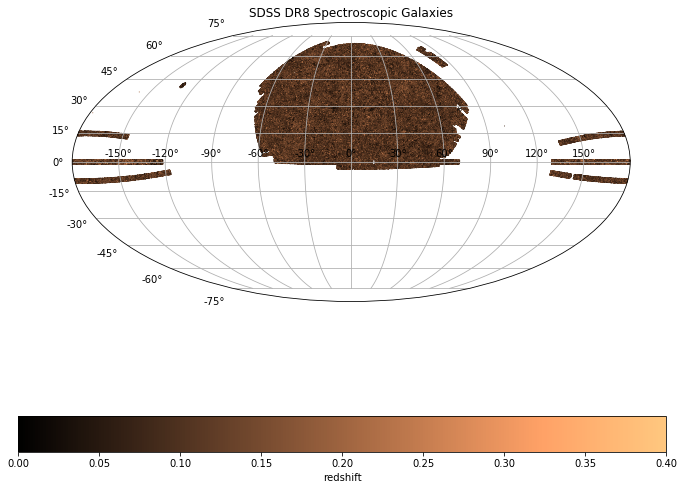

In [29]:
plt.figure(figsize=(10, 10))

ax = plt.axes(projection='mollweide')

ax.grid()
plt.scatter(RA, DEC, s=1, lw=0, c=data['z'], cmap=plt.cm.copper,
    vmin=0, vmax=0.4)

plt.title('SDSS DR8 Spectroscopic Galaxies')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.4, 9))
cb.set_label('redshift')

In [30]:
u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

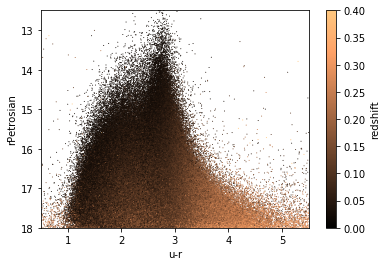

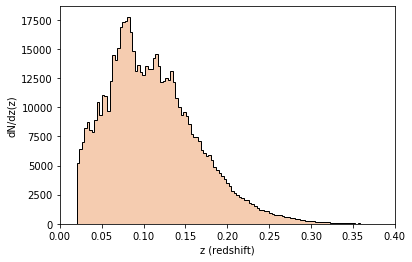

In [31]:
plt.figure()
ax = plt.axes()
plt.scatter(u - r, rPetro, s=1, lw=0, c=data['z'], cmap=plt.cm.copper,
            vmin=0, vmax=0.4)
plt.colorbar(ticks=np.linspace(0, 0.4, 9)).set_label('redshift')

plt.xlim(0.5, 5.5)
plt.ylim(18, 12.5)

plt.xlabel('u-r')
plt.ylabel('rPetrosian')

plt.figure()
hist(data['z'], bins='knuth',
     histtype='stepfilled', ec='k', fc='#F5CCB0')
plt.xlim(0, 0.4)
plt.xlabel('z (redshift)')
plt.ylabel('dN/dz(z)');